# **link datase**t : https://drive.google.com/drive/folders/1pHRiLalr38XQJBUr7kN1-Ydm0Pu8_h9O
# **Run code melalui google drive** link di atas : folder model -> data_analysis.ipynb (untuk analisis data) | model_cnn.ipynb untuk pemodelan

## IMPORT DATA

In [1]:
# Importing Libraries



import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display

# audio plot 
from scipy.io import wavfile as wav
import IPython.display as ipd
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Datmin UAS/"
print(os.listdir(path))

['trimmed_manusia', 'manusia', 'trimmer code', 'trimmed_tts', 'Model (1)', 'class', 'Tambahan (Suara Manusia)', 'TTS data 20 + 20', 'Model']


In [4]:
# Load Dataset
path = "/content/drive/MyDrive/Datmin UAS/"
path_manusia = "/content/drive/MyDrive/Datmin UAS/trimmed_manusia/"
path_tts = "/content/drive/MyDrive/Datmin UAS/trimmed_tts/"




## BUAT DATAFRAME

In [5]:
#Prepare Data
data_train = list(glob.glob(path+'/**/*.wav'))
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))
file_path = pd.Series(data_train, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data = data[data.Labels != 'class']
data = data[data.Labels != 'Tambahan (Suara Manusia)']
data = data[data.Labels != 'TTS data 20 + 20']


data.head()



File_Path           Labels
0  /content/drive/MyDrive/Datmin UAS/trimmed_tts/...      trimmed_tts
1  /content/drive/MyDrive/Datmin UAS/trimmed_manu...  trimmed_manusia
2  /content/drive/MyDrive/Datmin UAS/trimmed_tts/...      trimmed_tts
3  /content/drive/MyDrive/Datmin UAS/trimmed_tts/...      trimmed_tts
4  /content/drive/MyDrive/Datmin UAS/trimmed_tts/...      trimmed_tts

## SAMPLE RATE

In [6]:
features = []
for index, row in data.iterrows():
    file_name = str(row['File_Path'])
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    features.append(sample_rate)

In [7]:
featuresdf = pd.DataFrame(features, columns=['feature'])
featuresdf

feature
0      22050
1      22050
2      22050
3      22050
4      22050
..       ...
473    22050
474    22050
475    22050
476    22050
477    22050

[478 rows x 1 columns]

In [8]:
featuresdf['feature'].describe()

count      478.0
mean     22050.0
std          0.0
min      22050.0
25%      22050.0
50%      22050.0
75%      22050.0
max      22050.0
Name: feature, dtype: float64

## VISUALISASI DATA

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


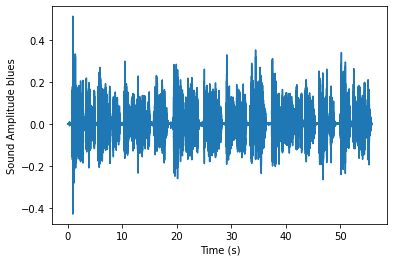

In [9]:
import librosa as lr
# file_name = str(data['File_Path'][0])
file_name = '/content/drive/MyDrive/Datmin UAS/trimmed_manusia/CONTOH VIDEO PERKENALAN DIRI UNTUK MELAMAR PEKERJAAN KURANG DARI 1 MENIT❗.mp3'
audio, sfreq = lr.load(file_name)

time = np.arange(0, len(audio))/sfreq
time
#plot audio over time
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude blues')
plt.show()


In [10]:
path_sound1 = '/content/drive/MyDrive/Datmin UAS/trimmed_tts/halo halo assalamual (1).mp3'


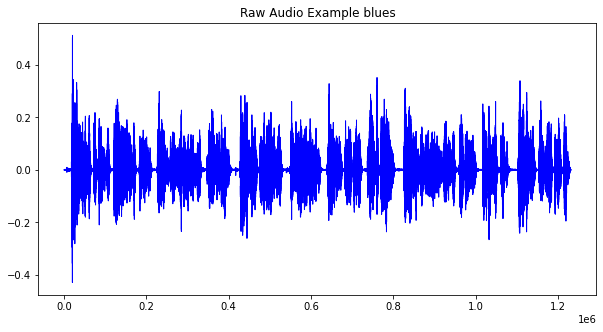

In [11]:
pd.Series(audio).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example blues',
                 color="blue")
plt.show()

In [12]:
def create_waveshow(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('waveshow for audio with {}'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


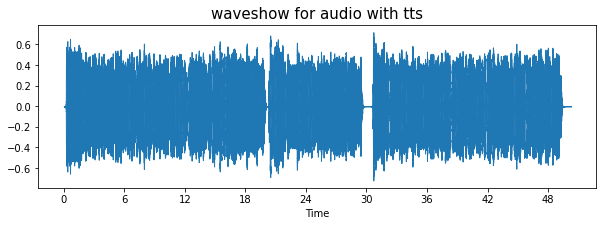

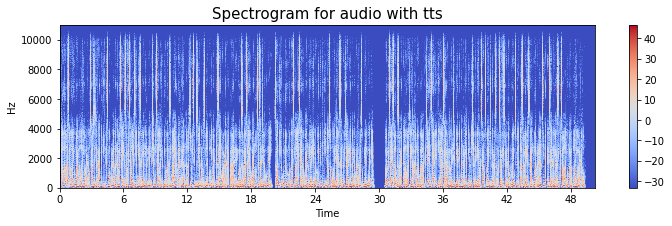

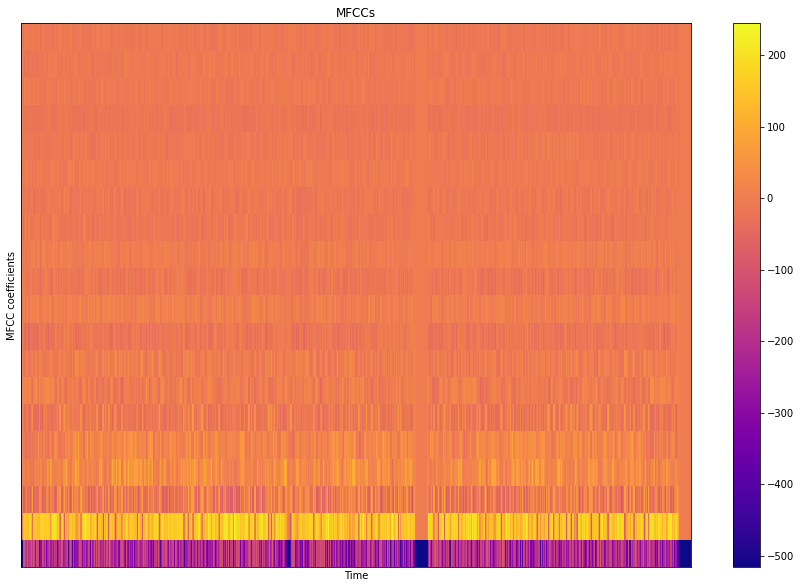

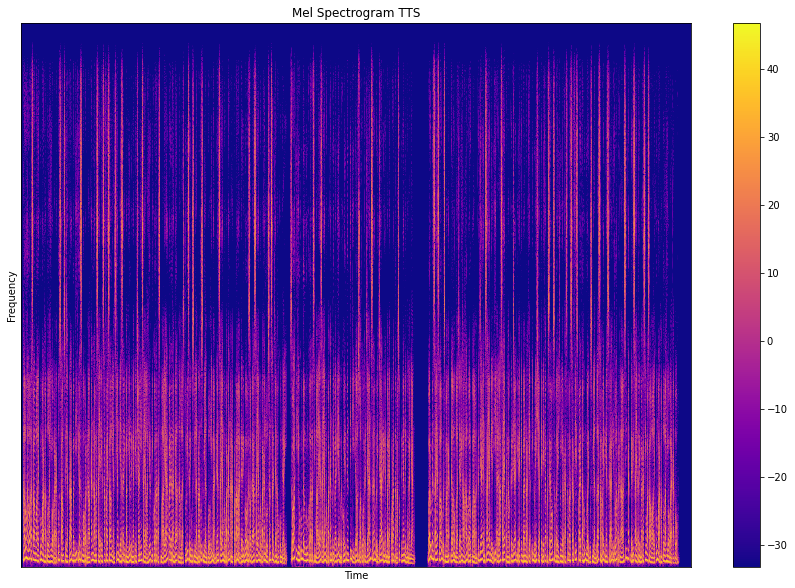

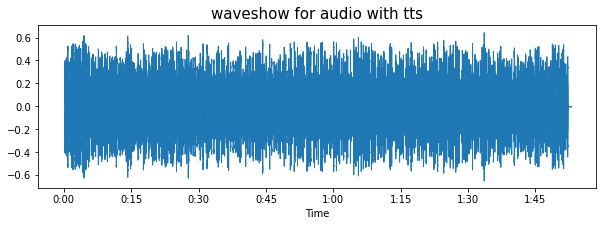

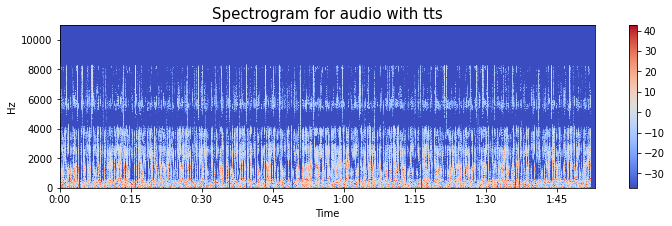

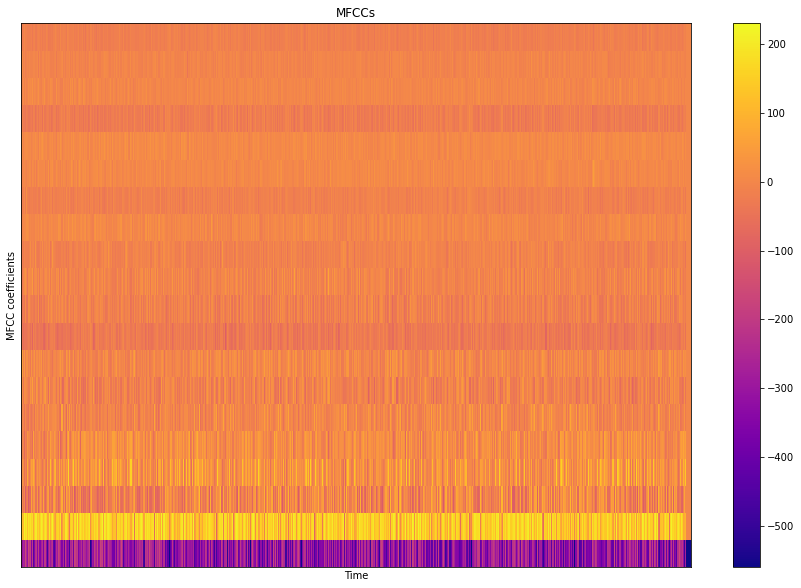

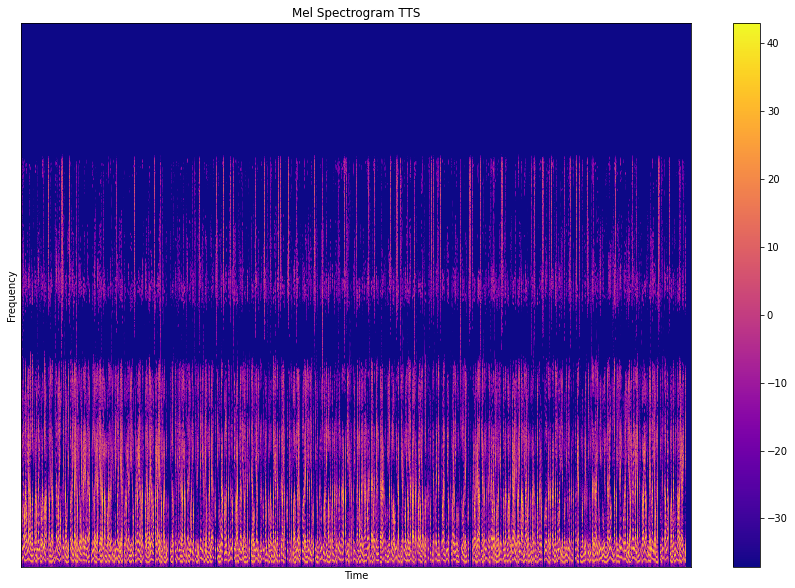

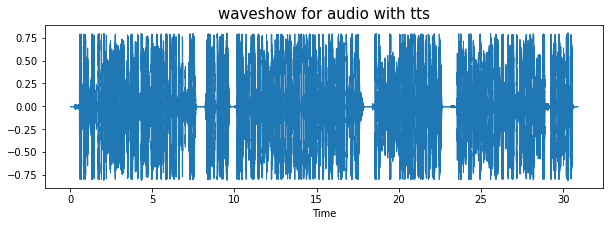

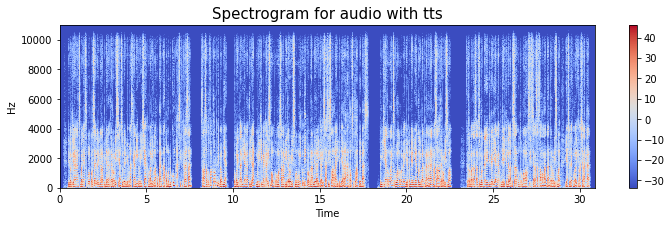

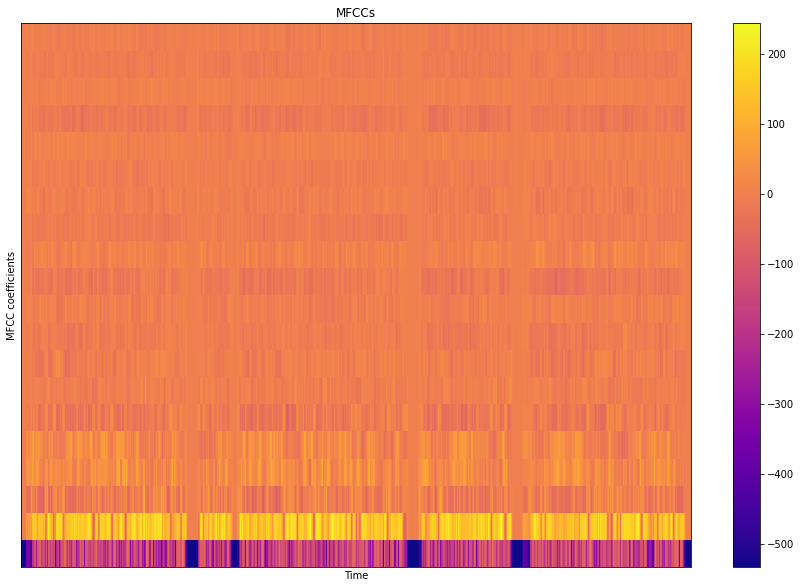

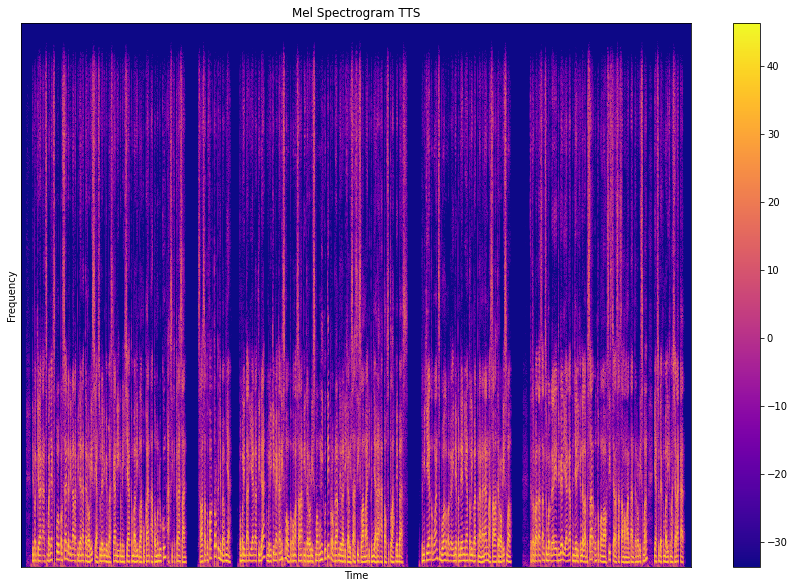

In [13]:
tts = ['halo halo assalamual (1).mp3','19d859b0-7586-11ed-a9ce-c3cd948728a6.wav','Copy of tts jaya 5.wav']
for i in tts:
  link = '/content/drive/MyDrive/Datmin UAS/trimmed_tts/' + i
  data, sampling_rate = librosa.load(link)
  create_waveshow(data, sampling_rate, 'tts')
  create_spectrogram(data, sampling_rate, 'tts')
  Audio(link)

  # MFCCs
  # extract 25 MFCCs
  MFCCs = librosa.feature.mfcc(data, sampling_rate)

  # display MFCCs
  plt.figure(figsize=(15,10))
  librosa.display.specshow(MFCCs, sr=sampling_rate)
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.set_cmap("plasma")
  plt.title("MFCCs")

  # show plots
  plt.show()

  # perform stft
  stftt = librosa.stft(data)

  # calculate abs values on complex numbers to get magnitude
  spectrogramm= np.abs(stftt)
  log_spectrogram = librosa.amplitude_to_db(spectrogramm)

  # display spectrogram
  plt.figure(figsize=(15,10))
  librosa.display.specshow(log_spectrogram, sr=sampling_rate)
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  plt.set_cmap("plasma")
  plt.title("Mel Spectrogram TTS")

data:  akp_14.wav


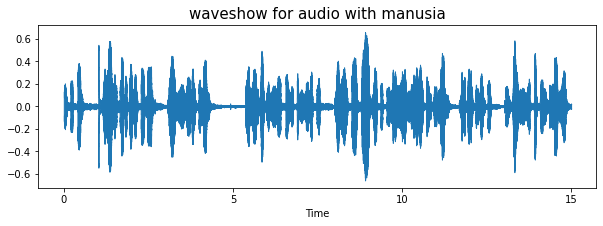

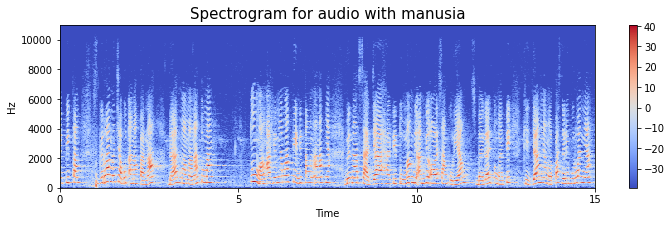

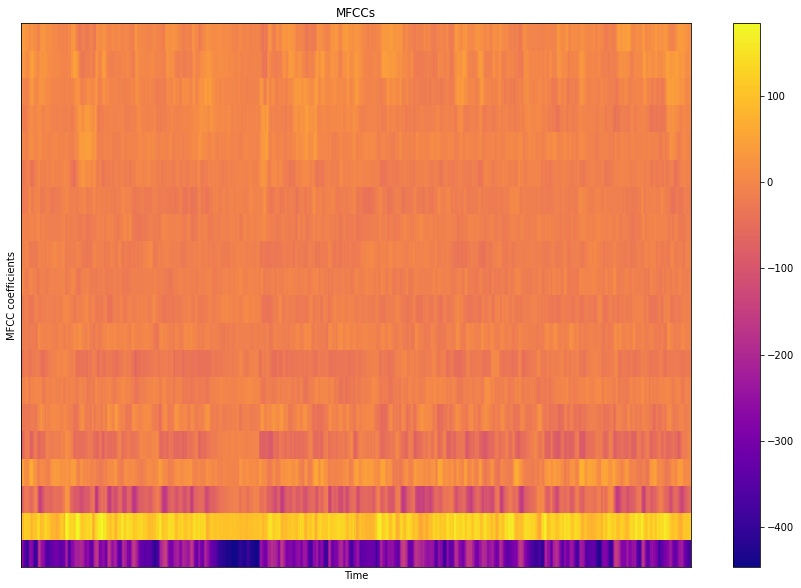

data:  sample3.wav


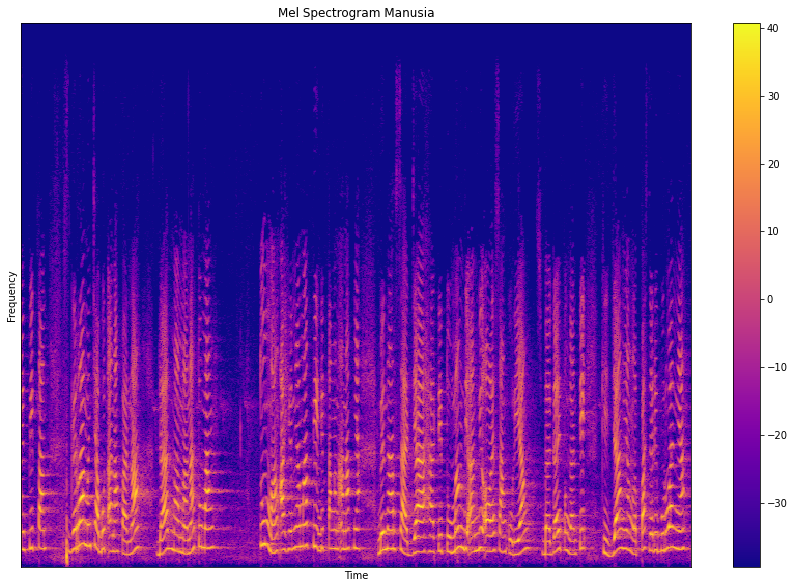

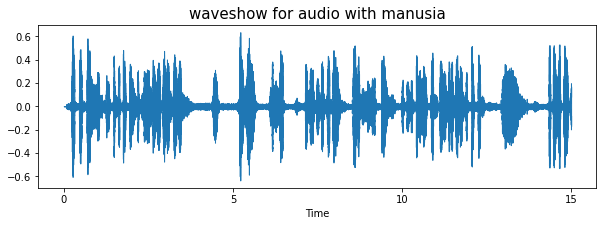

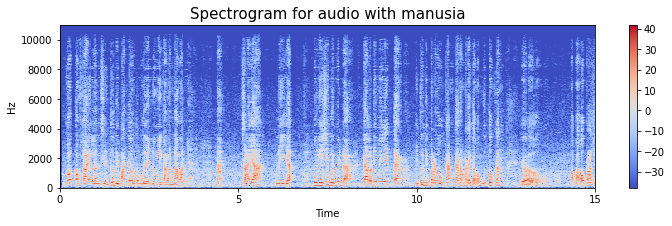

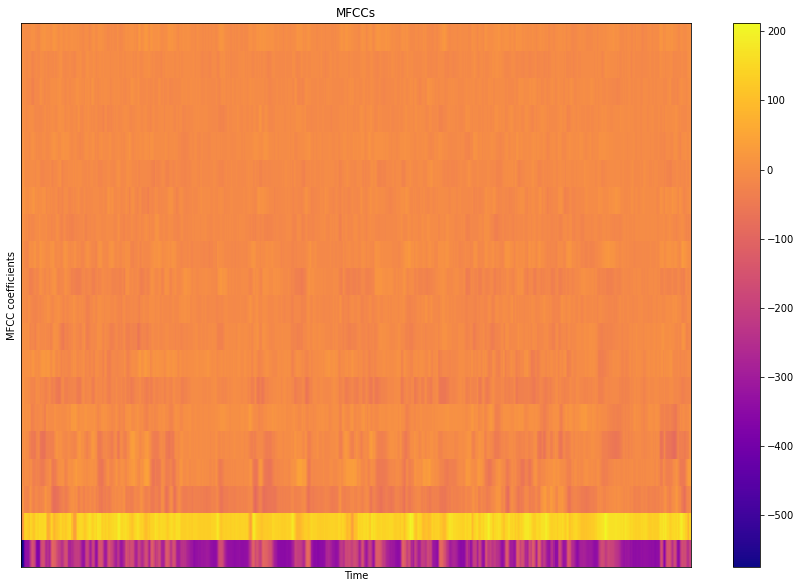

data:  sample54.wav


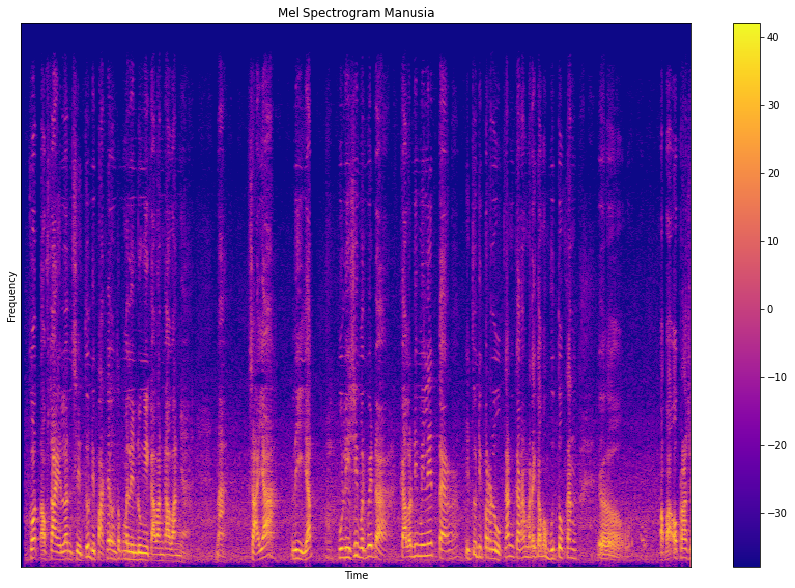

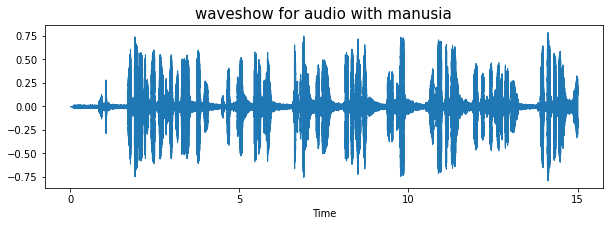

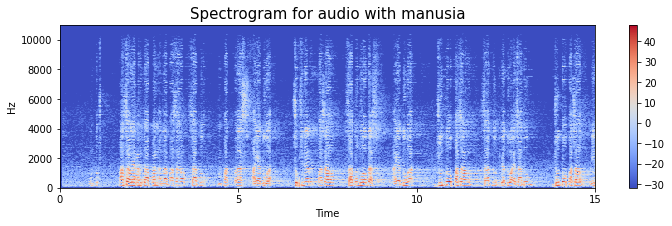

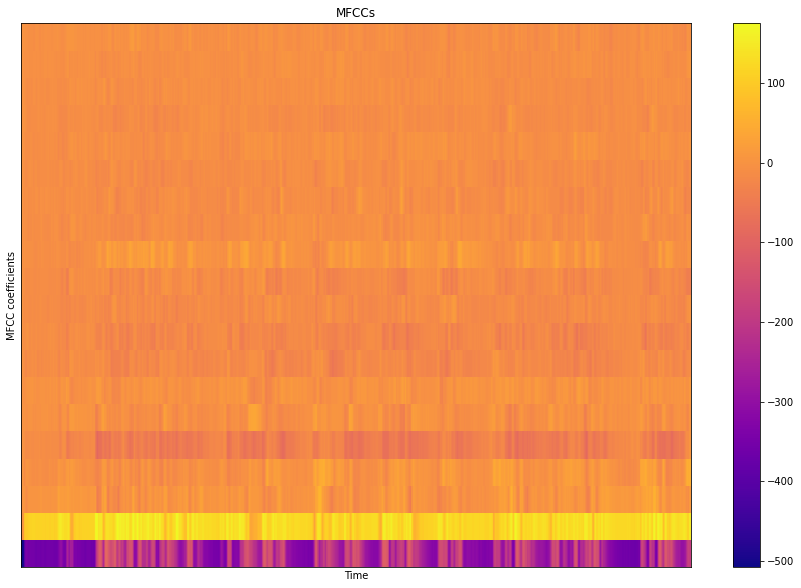

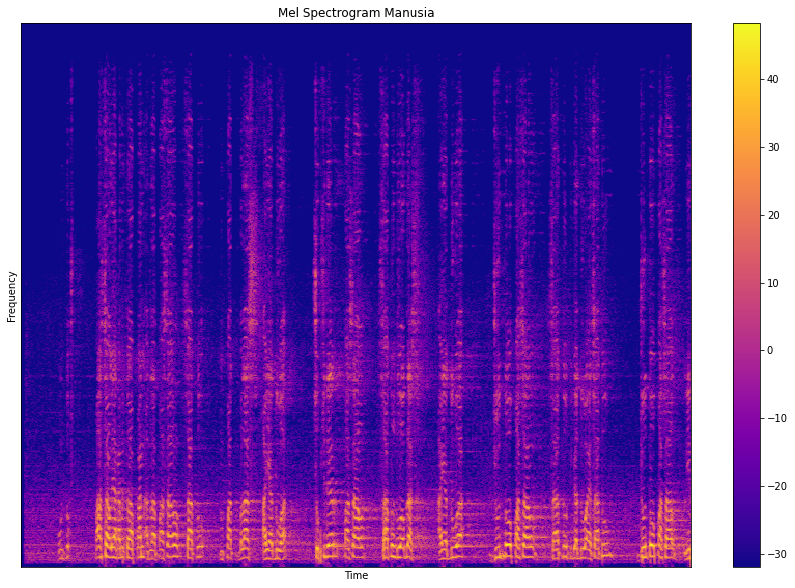

In [14]:
tts = ['akp_14.wav','sample3.wav','sample54.wav']
for i in tts:
  link = '/content/drive/MyDrive/Datmin UAS/trimmed_manusia/' + i
  data, sampling_rate = librosa.load(link)
  print("data: ",i)
  create_waveshow(data, sampling_rate, 'manusia')
  create_spectrogram(data, sampling_rate, 'manusia')
  Audio(link)

  # MFCCs
  # extract 25 MFCCs
  MFCCs = librosa.feature.mfcc(data, sampling_rate)

  # display MFCCs
  plt.figure(figsize=(15,10))
  librosa.display.specshow(MFCCs, sr=sampling_rate)
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  plt.set_cmap("plasma")
  plt.title("MFCCs")

  # show plots
  plt.show()

  # perform stft
  stftt = librosa.stft(data)

  # calculate abs values on complex numbers to get magnitude
  spectrogramm= np.abs(stftt)
  log_spectrogram = librosa.amplitude_to_db(spectrogramm)

  # display spectrogram
  plt.figure(figsize=(15,10))
  librosa.display.specshow(log_spectrogram, sr=sampling_rate)
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  plt.set_cmap("plasma")
  plt.title("Mel Spectrogram Manusia")
